# Metodología de la Simulación

### 1. Identifique las variables

Aquellas cuyo comportamiento define el comportamiento o la evoución global del sistema real.

### 2. Determine la distribución de probabilidad

Elija el tipo de distribución de probabilidad que mejor defina el comportamiento aleatorio de cada una de las variables del sistema identificadas en el paso anterior.

### 3. Modele las variables aleatorias

Cosntruya un modelo fiel de la aleatoriedad de las variables del sistema. Simular el comportamiento del sistema implica generar muestras aleatorias de cada variable que sigan fielmente la distribución de probabilidad correspondiente.

### 4. Defina el modelo del sistema y los objetivos de la simulación

Fije los objetivos y diseñe un modelo del sistema real que abstraiga sus propiedades más relevantes. Todo error en el modelo (o su implementación computacional) puede dar lugar a conclusiones equivocadas.

Antes de experimentar con el modelo, asegurarse de que refleja fielmente el sistema real **validando** el mismo a partir de datos reales, para ello compare los resultados obtenidos de la simulación con los producidos por el sistema.

### 5. Diseñe el experimento

Diseñe un experimento así como las ejecuciones concretas del mismo, los escenarios que desea estudiar para alcanzar los objetivos fijados. El experimento consiste en generar valores de las variables cuyo comportamiento define el comportamiento del sistema y analizar este ante dichos valores.

### 6. Repita el experimento $n$ veces

Así dispondrá de $n$ observaciones sobre el comportamiento del sistema, lo que permitirá entender su funcionamiento así como evaluar el desempeño del mismo frente a los diversos escenarios establecidos.

El **método Monte Carlo** se basa en la **Ley Fuerte de los Grandes Números** y el **Teorema del Límite Central**.

## Ejemplo Método Monte Carlo Acierto y Error

Calcule la integral de 0 a inf de x(1+x^2)^-2 dx

1. Analíticamente.
2. Mediante simulación.

Analiticamente:

integral de 0 a inf de x(1+x^2)^-2 dx
u= 1+x^2
du = 2xdx
du/2x = dx
integral de 0 a inf de x(1+x^2)^-2 dx = integral de 0 a inf x u^-2 du/2x =
1/2 Integral de 0 a inf u^-2 du
regresando el cambio de variable obtenemos:

  -1/2(1+x)^2 , evaluado de 0 a inf
  
  evaluando =1/2

**PASO 1**. Defina las variables que intervienen en el modelo.

Variable x

**PASO 2**. Formule la distribución de probabilidad de cada variable.

La variable x se distribuye uniformemente en el intervalo [0, 1]. Esto se debe a que la función de densidad de probabilidad de la distribución uniforme es constante en este untervalo.

**PASO 3**. Enumere la distribución acumulada de probabilidad de cada variable.

F(x) = x para 0<=x<=1 con F(x)= P(X<=x)

**PASO 4**. Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

Dado que la función es positiva en todo el intervalo, podemos establecer el intervalo de números aleatorios para \( x \) en \( [0, M] \), donde \( M \) es algún número finito lo suficientemente grande.


**PASO 5**. Genere números aleatorios.

In [16]:
import numpy as np

def monte_carlo_integration(N, M):
    # Generar N números aleatorios en el intervalo [0, M]
    random_numbers = np.random.uniform(0, M, N)

    # Evaluar la función en los números aleatorios generados
    values = random_numbers * (1 + random_numbers**2)**(-2)

    # Calcular la aproximación de la integral
    integral_approximation = np.mean(values) * M

    return integral_approximation

# Número de muestras aleatorias
N = 100000
M = 10

approximation = monte_carlo_integration(N, M)

print("Aproximación de la integral:", approximation)


Aproximación de la integral: 0.49569921540272555


**PASO 6**. Simule un lanzamiento.

In [17]:
import numpy as np

def monte_carlo_integration(N, M):
    # Generar N números aleatorios en el intervalo [0, M]
    random_numbers = np.random.uniform(0, M, N)

    # Evaluar la función en los números aleatorios generados
    values = random_numbers * (1 + random_numbers**2)**(-2)

    # Calcular la aproximación de la integral
    integral_approximation = np.mean(values) * M

    return integral_approximation

# Número de muestras aleatorias
N = 100000

# Valor de M (puedes ajustar este valor según la precisión que desees)
M = 10

# Calcular la aproximación de la integral utilizando el método de Monte Carlo
approximation = monte_carlo_integration(N, M)

print("Aproximación de la integral:", approximation)


Aproximación de la integral: 0.49435028218061117


**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para
garantizar la convergencia del resultado.

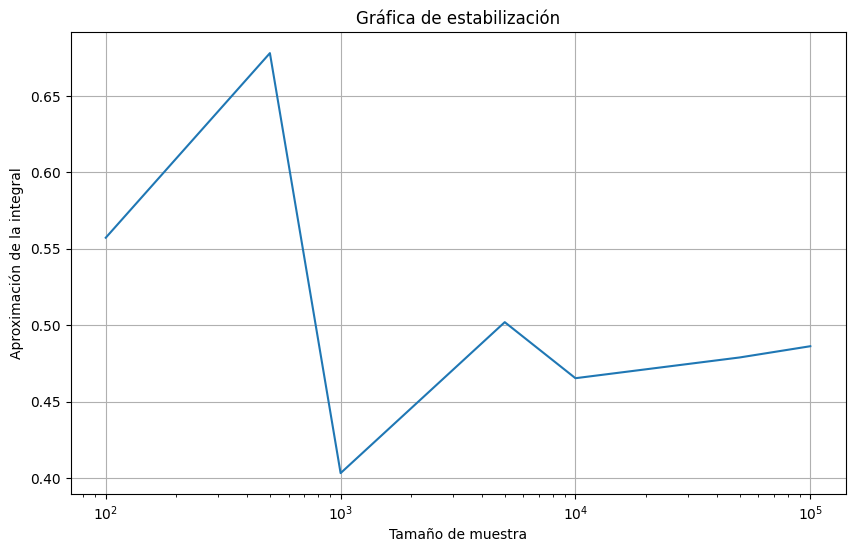

In [23]:
#Joel Ricardo Villagómez de Alba
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_integration(N, M):
    random_numbers = np.random.uniform(0, M, N)
    values = random_numbers * (1 + random_numbers**2)**(-2)
    integral_approximation = np.mean(values) * M
    return integral_approximation

# Valor de M
M = 100

# Tamaños de muestra a probar
sample_sizes = [100, 500, 1000, 5000, 10000, 50000, 100000]

# Lista para almacenar las aproximaciones de la integral
integral_approximations = []

# Calcular las aproximaciones de la integral para cada tamaño de muestra
for N in sample_sizes:
    approximation = monte_carlo_integration(N, M)
    integral_approximations.append(approximation)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, integral_approximations)
plt.xscale('log')  # Escala logarítmica en el eje x para una mejor visualización
plt.xlabel('Tamaño de muestra')
plt.ylabel('Aproximación de la integral')
plt.title('Gráfica de estabilización')
plt.grid(True)
plt.show()
